In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
loan_data = pd.read_csv('loan.csv', low_memory=False)

# Data Cleaning and Filtering

In [7]:
# Remove columns with more than 90% missing values
columns_to_drop = loan_data.columns[loan_data.isnull().mean() > 0.9]
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

In [8]:
# Remove columns with more than 90% missing values
columns_to_drop = loan_data.columns[loan_data.isnull().mean() > 0.9]
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

# Fill missing values or drop rows/columns as required based on the analysis context

In [9]:
# Convert 'emp_length' to numeric, handle '< 1 year' and '10+ years'
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].replace({'< 1 year': 0, '10+ years': 10})
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].str.extract('(\d+)').astype(float)


# Univariate Analysis Visualizations

## Loan Amount Distribution

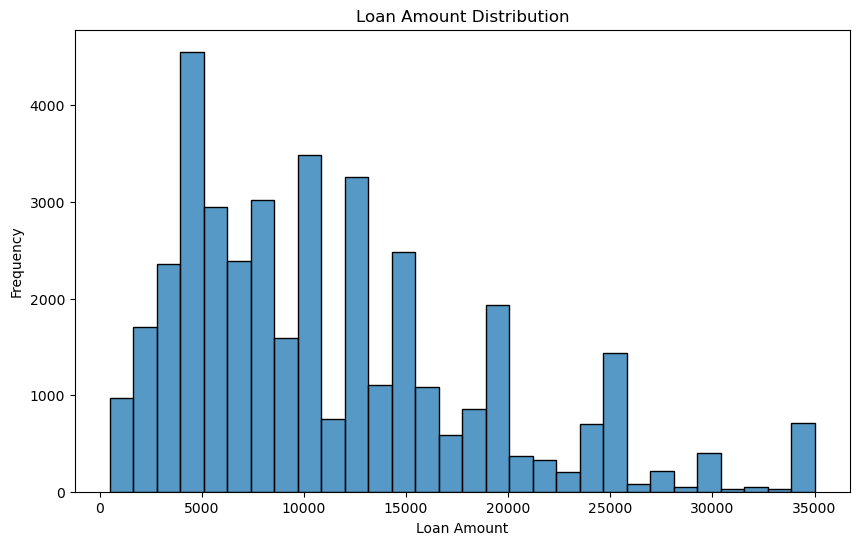

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

## Interest Rate Distribution

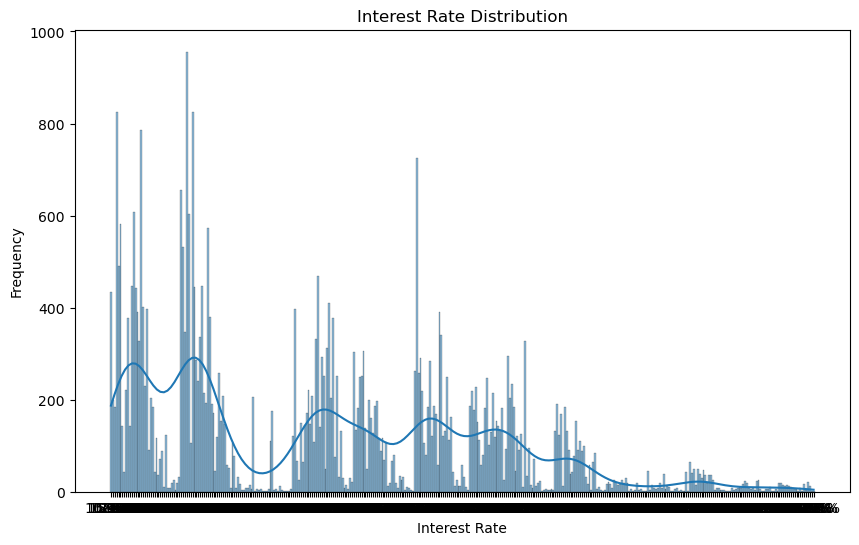

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['int_rate'], bins=30, kde=True)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

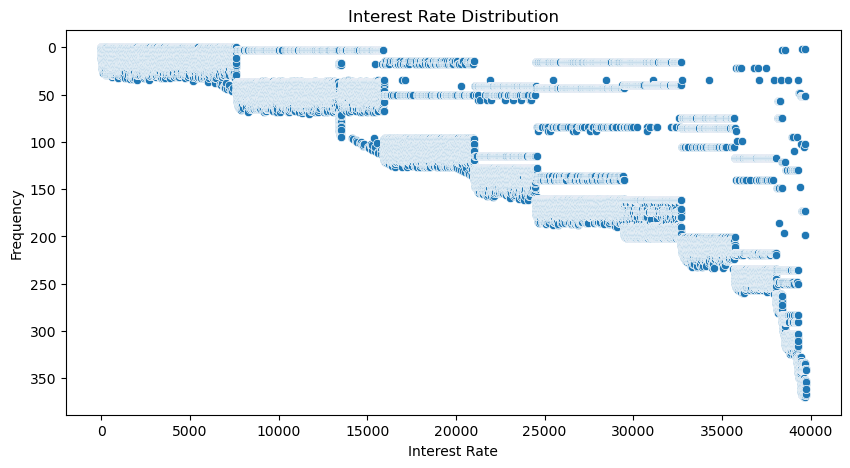

In [17]:
plt.figure(figsize=(10, 5))

x=sns.scatterplot(loan_data_cleaned['int_rate'])
x.set_yscale("linear")
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

## Employment Length Distribution

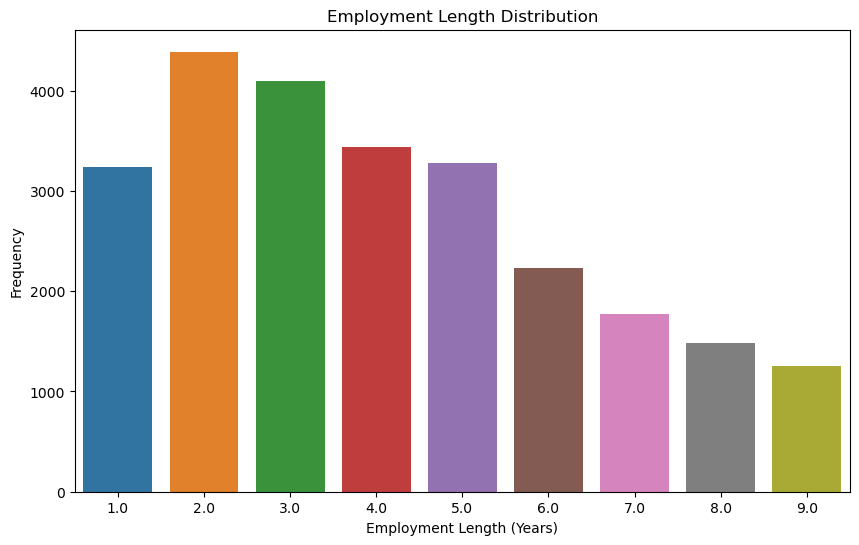

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=loan_data_cleaned)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Frequency')
plt.show()

## Annual Income Distribution

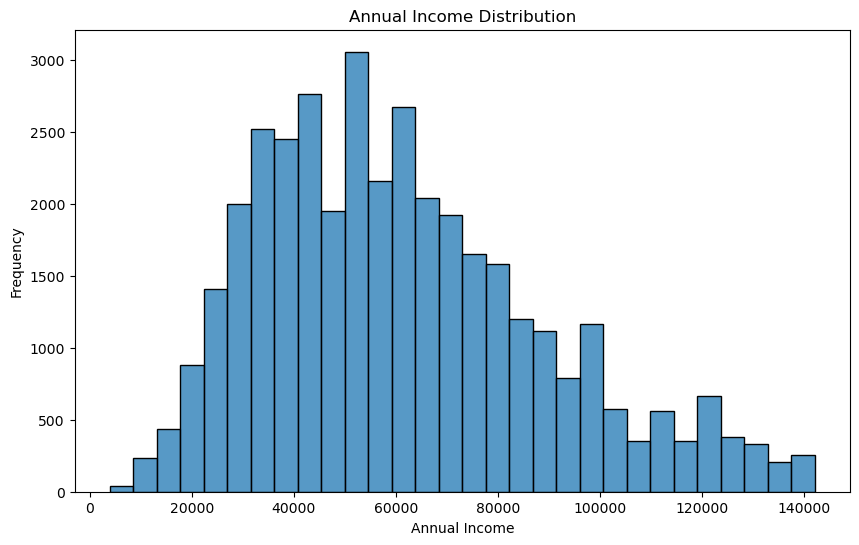

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned[loan_data_cleaned['annual_inc'] < loan_data_cleaned['annual_inc'].quantile(0.95)]['annual_inc'], bins=30)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


## Distribution of Loan Status by Public Record Bankruptcies

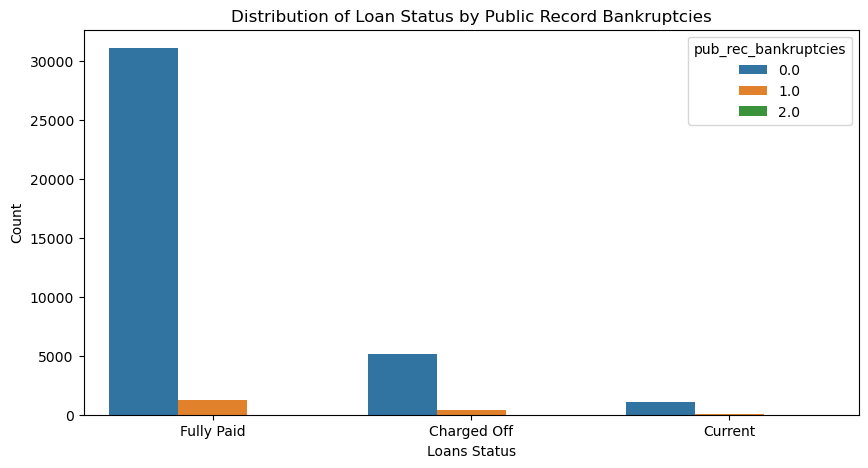

In [14]:
plt.figure(figsize=(10,5))

sns.countplot(data=loan_data_cleaned,x='loan_status',hue='pub_rec_bankruptcies')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by Public Record Bankruptcies',fontsize=12)
plt.show()

## Distribution of Funded Amount based on Loan Status

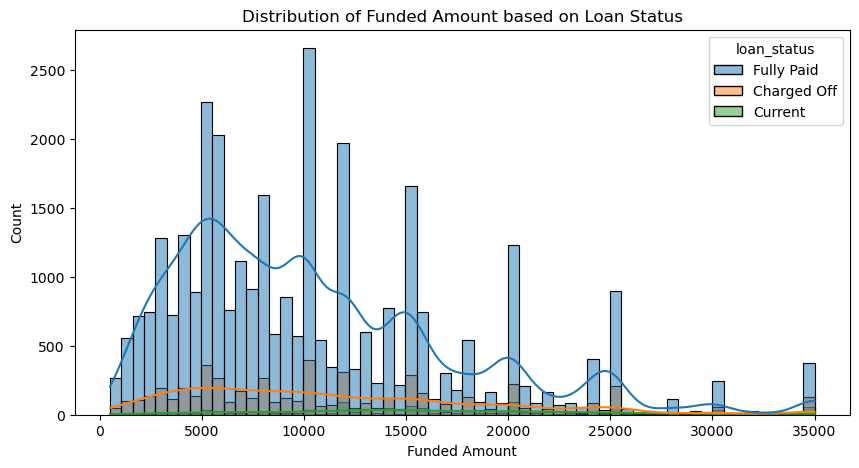

In [15]:
plt.figure(figsize=(10,5))

sns.histplot(data=loan_data_cleaned,x='funded_amnt',hue='loan_status',kde=True)
plt.xlabel('Funded Amount')
plt.ylabel('Count')
plt.title('Distribution of Funded Amount based on Loan Status',fontsize=12)
plt.show()

# Bivariate Analysis Visualizations

## Loan Status vs Loan Amount

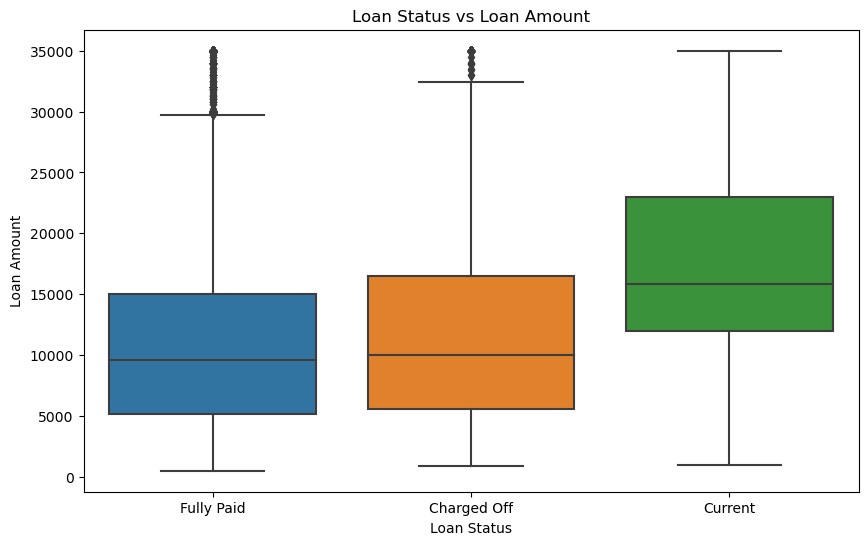

In [197]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned)
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

In [198]:
# Remove percent symbol from 'int_rate' and convert to numeric
if not pd.api.types.is_numeric_dtype(loan_data_cleaned['int_rate']):
    loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.rstrip('%').astype(float)

# Interest Rate vs Loan Status

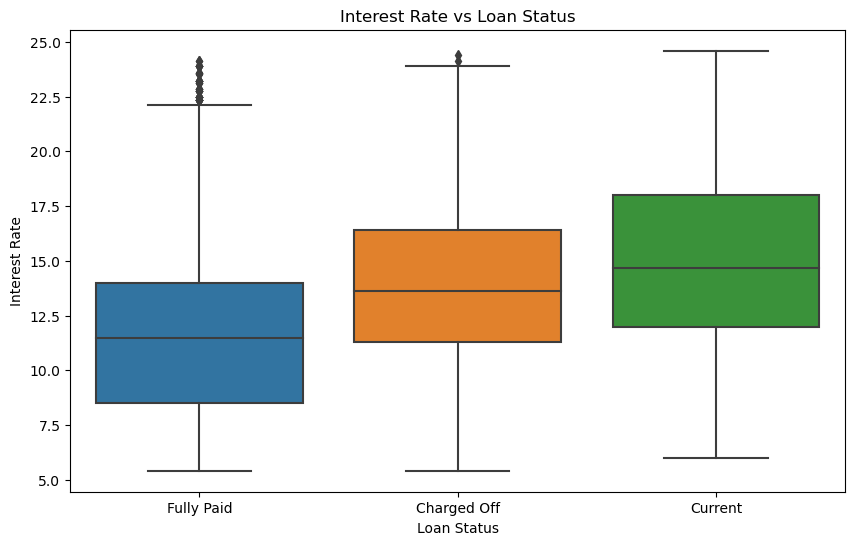

In [199]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned)
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

## Employment Length vs Loan Status

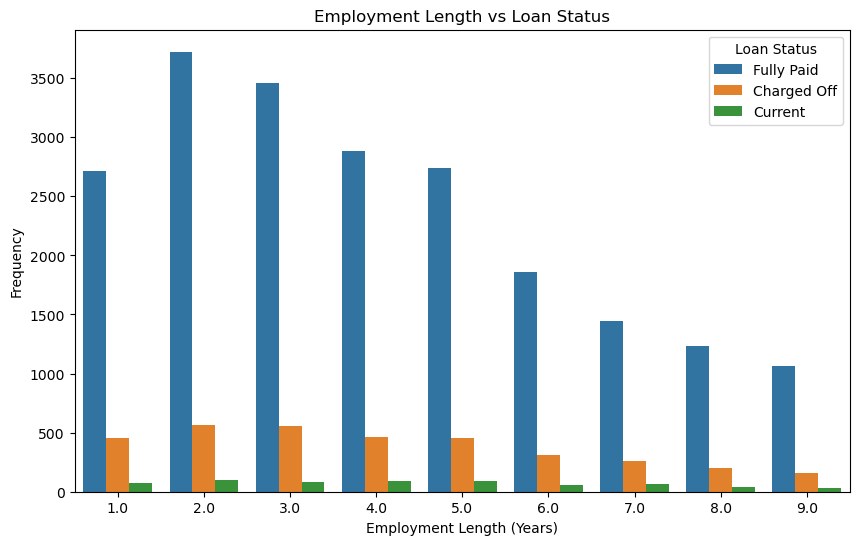

In [200]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan_data_cleaned)
plt.title('Employment Length vs Loan Status')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Frequency')
plt.legend(title='Loan Status')
plt.show()

## Annual Income vs Loan Status

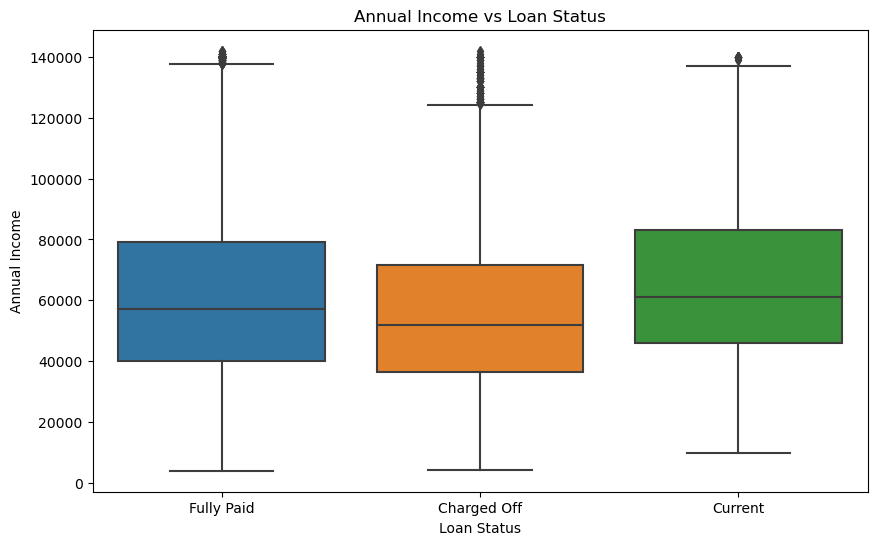

In [201]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_cleaned[loan_data_cleaned['annual_inc'] < loan_data_cleaned['annual_inc'].quantile(0.95)])
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()


# Derived Metrics and Additional Visualizations

## Debt-to-Income Ratio

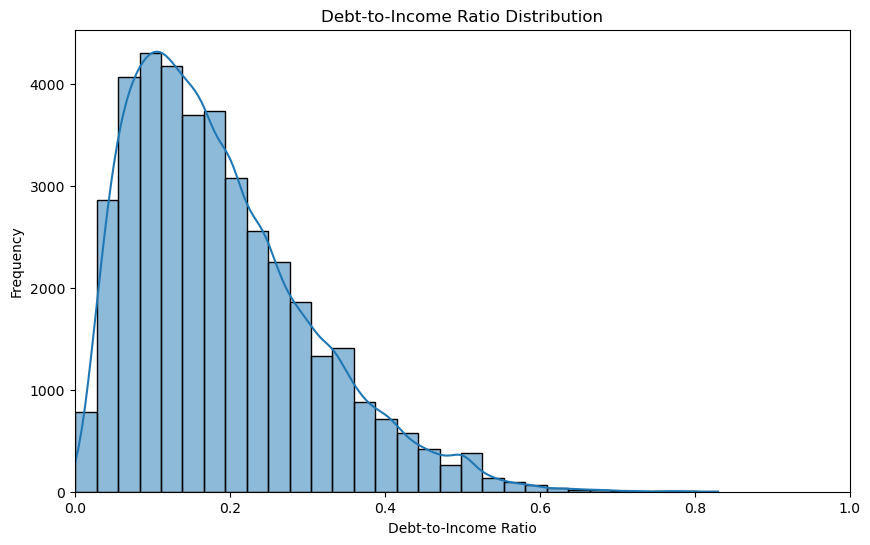

In [202]:
loan_data_cleaned['dti_ratio'] = loan_data_cleaned['loan_amnt'] / loan_data_cleaned['annual_inc']
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['dti_ratio'], bins=30, kde=True)
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.show()


## Visualization for Loan Utilization Rate (using DTI Ratio) vs Loan Status

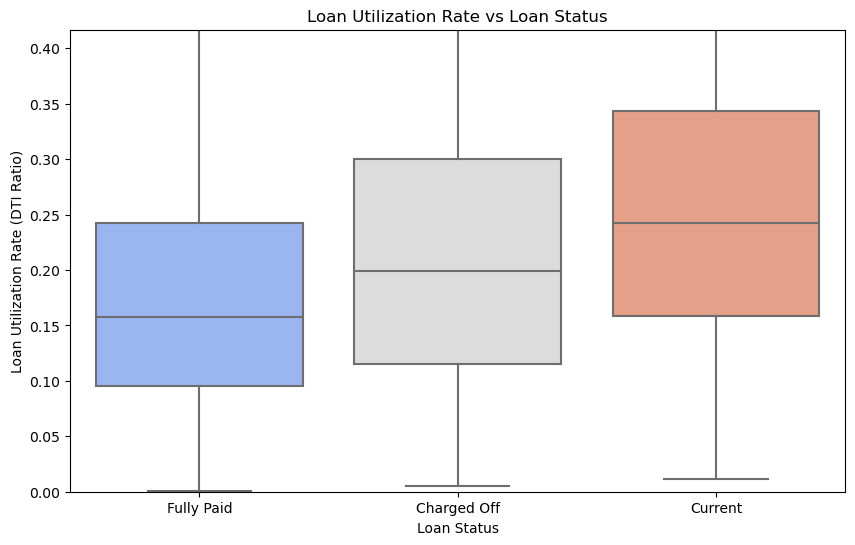

In [205]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti_ratio', data=loan_data_cleaned, palette='coolwarm')
plt.title('Loan Utilization Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Utilization Rate (DTI Ratio)')
plt.ylim(0, loan_data_cleaned['dti_ratio'].quantile(0.95))  # Limiting to 95th percentile for clearer visualization
plt.show()

## Home Ownership vs Loan Status

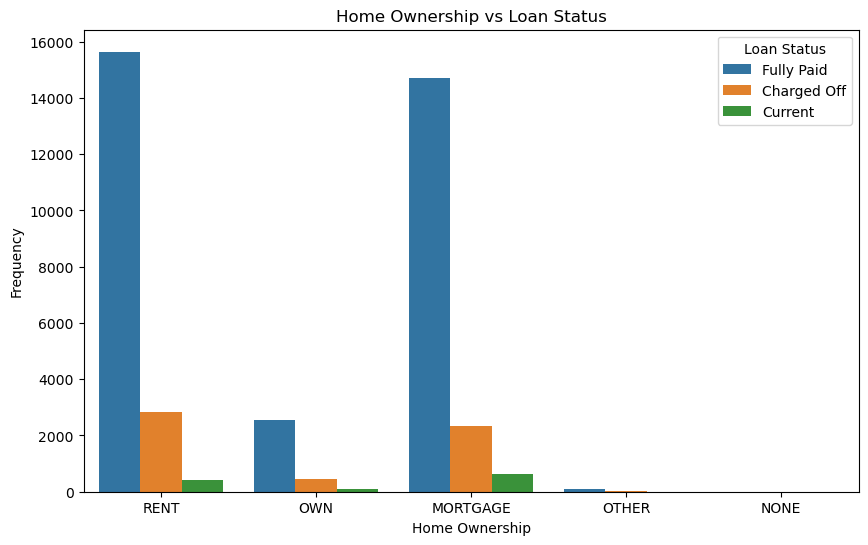

In [183]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data_cleaned)
plt.title('Home Ownership vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.legend(title='Loan Status')
plt.show()


## Loan Purpose vs Loan Status

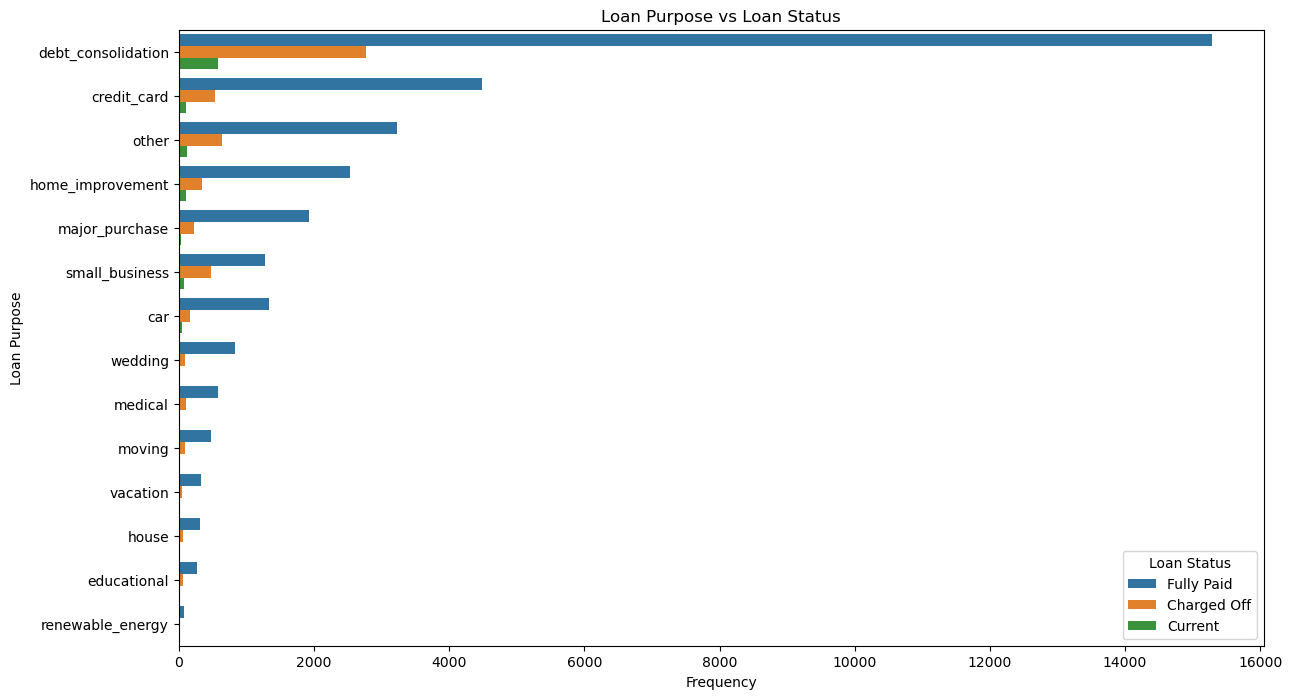

In [184]:
plt.figure(figsize=(14, 8))
sns.countplot(y='purpose', hue='loan_status', data=loan_data_cleaned, order=loan_data_cleaned['purpose'].value_counts().index)
plt.title('Loan Purpose vs Loan Status')
plt.xlabel('Frequency')
plt.ylabel('Loan Purpose')
plt.legend(title='Loan Status')
plt.show()
